<a href="https://colab.research.google.com/github/Rover-sp24/baby-cry-analysis/blob/main/baby_cry_doo_doo_doo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/gveres/donateacry-corpus.git



Cloning into 'donateacry-corpus'...
remote: Enumerating objects: 1616, done.
remote: Total 1616 (delta 0), reused 0 (delta 0), pack-reused 1616 (from 1)
Receiving objects: 100% (1616/1616), 67.06 MiB | 28.45 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [5]:
!ls donateacry-corpus


donateacry-android-upload-bucket	    donateacry-ios-upload-bucket
donateacry_corpus_cleaned_and_updated_data  README.md


In [6]:
!pip install librosa soundfile numpy pandas matplotlib seaborn scikit-learn torch torchaudio


In [7]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [9]:
!ls

donateacry-corpus  sample_data


In [10]:
!ls donateacry-corpus

donateacry-android-upload-bucket	    donateacry-ios-upload-bucket
donateacry_corpus_cleaned_and_updated_data  README.md


In [12]:
!find donateacry-corpus -type f -name "*.wav" | head -20


donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/89964233-cbdb-4f34-a819-5f4b5ce3f5f5-1430049868816-1.7-f-04-hu.wav
donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/D1CB71F9-EF76-49B3-A703-41D557444D21-1436863375-1.1-m-04-hu.wav
donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/101c6709-39fb-44dc-b905-7cbeed5714a2-1434361963544-1.7-f-04-hu.wav
donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/aaa57dbd-7b88-454a-963e-6faa2f4ed4e7-1436910225455-1.7-f-04-hu.wav
donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/d79affbc-f7b4-4ef0-ae57-be5da4b827bf-1430761528998-1.7-m-72-hu.wav
donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/177dc72e-d0f8-47ef-a5a7-3b46878e11a0-1430736549614-1.7-f-26-hu.wav
donateacry-corpus/donateacry_corpus_cleaned_and_updated_data/hungry/9aa8bac5-eeb9-4f19-a4bf-7c439e87364b-1430745312460-1.7-m-04-hu.wav
donateacry-corpus/donateacry_corpus_cleaned_and_updated_da

In [16]:
BASE_PATH = "donateacry-corpus/donateacry_corpus_cleaned_and_updated_data"


In [17]:
import os

labels = [d for d in os.listdir(BASE_PATH)
          if os.path.isdir(os.path.join(BASE_PATH, d))]

print("Cry categories:", labels)



Cry categories: ['hungry', 'discomfort', 'belly_pain', 'tired', 'burping']


In [19]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

label = "hungry"  # try others later
sample_file = os.listdir(os.path.join(BASE_PATH, label))[0]
sample_path = os.path.join(BASE_PATH, label, sample_file)

print("Sample file:", sample_file)



Sample file: 89964233-cbdb-4f34-a819-5f4b5ce3f5f5-1430049868816-1.7-f-04-hu.wav


In [20]:
y, sr = librosa.load(sample_path, sr=None)

print("Sample rate:", sr)
print("Duration (seconds):", round(len(y)/sr, 2))


Sample rate: 8000
Duration (seconds): 6.92


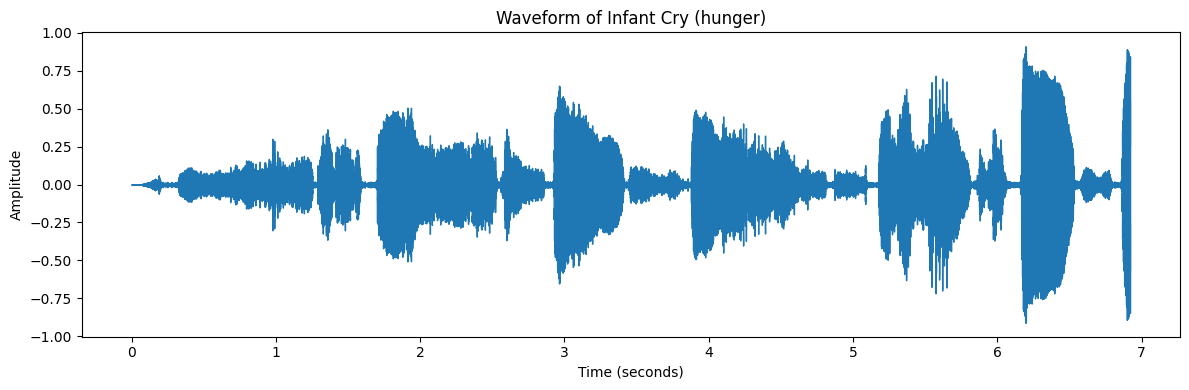

In [33]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of Infant Cry ({label})")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


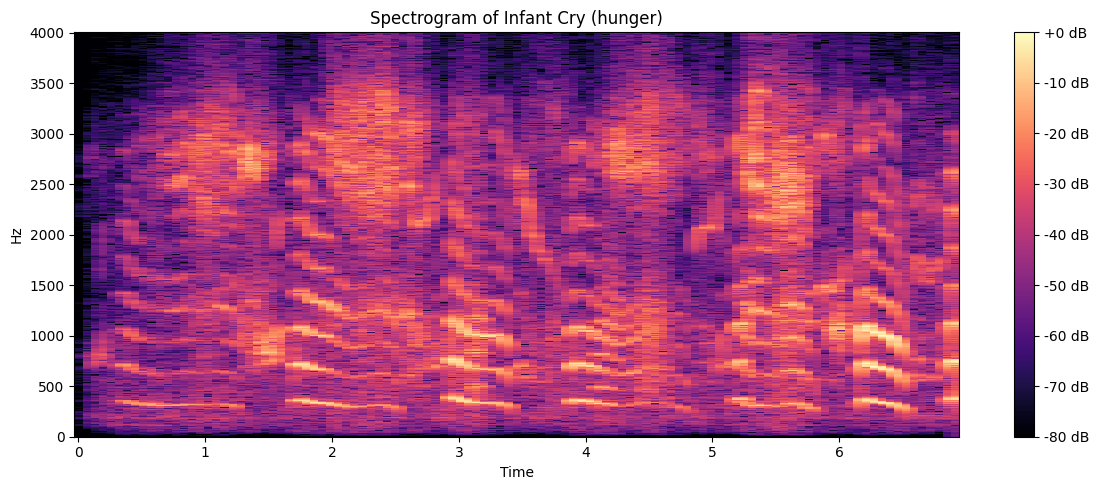

In [34]:
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(12,5))
librosa.display.specshow(
    S_db,
    sr=sr,
    x_axis="time",
    y_axis="hz"
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spectrogram of Infant Cry ({label})")
plt.tight_layout()
plt.show()


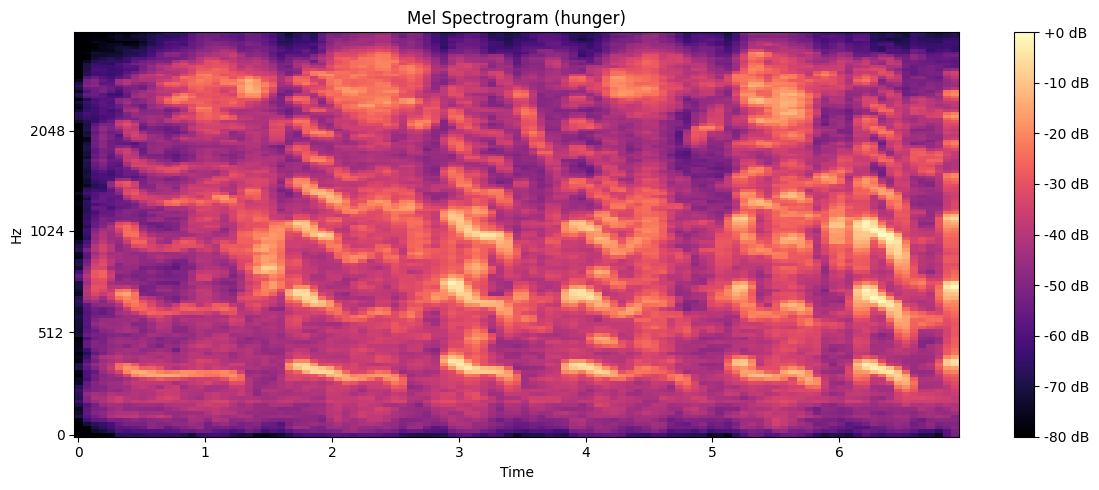

In [35]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(12,5))
librosa.display.specshow(
    mel_db,
    sr=sr,
    x_axis="time",
    y_axis="mel"
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"Mel Spectrogram ({label})")
plt.tight_layout()
plt.show()


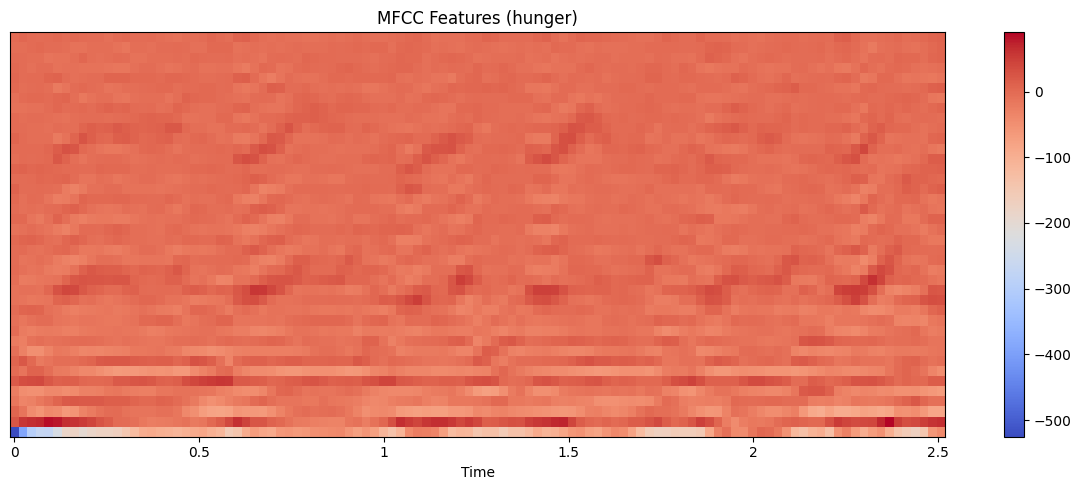

In [36]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(12,5))
librosa.display.specshow(
    mfcc,
    x_axis="time"
)
plt.colorbar()
plt.title(f"MFCC Features ({label})")
plt.tight_layout()
plt.show()


In [37]:
mfcc_mean = np.mean(mfcc.T, axis=0)
print("MFCC feature vector shape:", mfcc_mean.shape)


MFCC feature vector shape: (40,)
